In [1]:
import seaborn as sns; sns.set(font="IPAexGothic")
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
print(sns.__version__)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

np.random.seed(1000)

d = pd.read_csv("Y_TEST.csv")

0.9.0


# dataの中身の確認

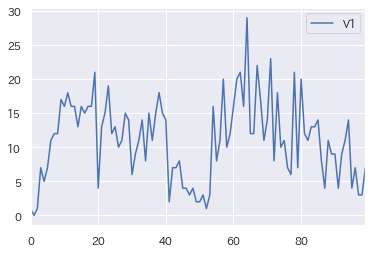

In [2]:
d.plot()

In [3]:
d2 = pd.concat([d[:int(len(d)/2)],d[int(len(d)/2):].reset_index(drop=True)],axis=1)
d2.columns = ['V1','V2']

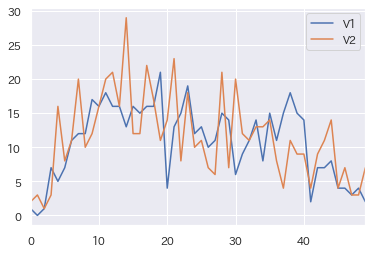

In [4]:
d2.plot()

# pystan model記述

In [5]:
import pystan
#;のあとにスペース TABがあるとエラー吐く
model = '''
data {
    int I;
    int J;
    int Y[I, J];
}
parameters {
    real r[I, J];
    real<lower=0> s;
    real<lower=0> beta;
}
model{
    for(i in 1:I){
        for(j in 2:J){
            r[i,j]~normal(r[i,j-1],s);
        }
    }

    for(i in 2:I){
        for(j in 1:J){
            r[i,j]~normal(r[i-1,j],s);
        }
    }

    for(i in 1:I){
        for(j in 1:J){
            Y[i,j] ~ poisson_log(r[i,j] + beta);
        }
    }
}
generated quantities{
    real Y_mean[I,J];
    
    for(i in 1:I){
        for(j in 1:J){
            Y_mean[i,j] =exp( r[i,j]+beta );
        }
    }
}
'''

# sampling 実行

In [6]:
dat = {'I': d2.shape[0],
       'J': d2.shape[1],
       'Y': d2
      }
#print(dat)
n_itr = 10000
n_warmup = 3000
#モデル作成
%time model = pystan.StanModel(model_code=model)
#サンプリング実行
%time fit = model.sampling(data=dat, iter=n_itr, warmup=n_warmup)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1d62cda80144cd046e77fe332c31ad55 NOW.


Wall time: 59.7 s


Wall time: 2min 28s


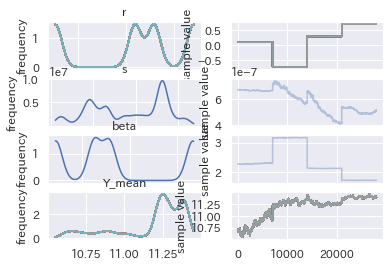

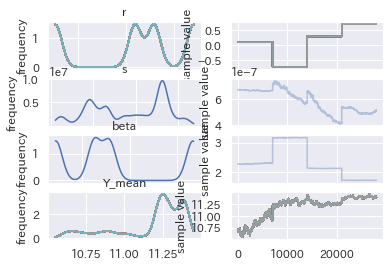

In [7]:
fit.plot()

In [8]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_1d62cda80144cd046e77fe332c31ad55.
4 chains, each with iter=10000; warmup=3000; thin=1; 
post-warmup draws per chain=7000, total post-warmup draws=28000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[1,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.6
r[2,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.6
r[3,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.7
r[4,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.6
r[5,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.7
r[6,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.7
r[7,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.8
r[8,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52   0.71      2 3493.9
r[9,1]    0.09    0.37   0.53  -0.74  -0.37   0.19   0.52 

In [11]:
fit.extract()

OrderedDict([('r', array([[[0.0926077 , 0.09260759],
                      [0.09260831, 0.09260817],
                      [0.0926088 , 0.09260813],
                      ...,
                      [0.09260974, 0.09260911],
                      [0.0926092 , 0.09260847],
                      [0.09260898, 0.09260887]],
              
                     [[0.09267847, 0.09267899],
                      [0.09267894, 0.09267924],
                      [0.09267935, 0.09268   ],
                      ...,
                      [0.09268053, 0.09268104],
                      [0.092681  , 0.09268139],
                      [0.09268179, 0.09268124]],
              
                     [[0.0926486 , 0.09264922],
                      [0.09264916, 0.09264831],
                      [0.0926492 , 0.09264897],
                      ...,
                      [0.0926487 , 0.09264887],
                      [0.09264837, 0.09264819],
                      [0.0926482 , 0.09264789]],
              
  

In [121]:
result = pd.DataFrame(fit.extract()['r'])

In [28]:
Y_mean = fit.extract('Y_mean')['Y_mean']
Y_mean.shape

(28000, 50, 2)

In [29]:
Y_mean_0 = pd.DataFrame(Y_mean[:,:,0])
Y_mean_1 = pd.DataFrame(Y_mean[:,:,1])

In [38]:
Y_mean_1.mean()

0     11.185006
1     11.185006
2     11.185006
3     11.185006
4     11.185006
5     11.185006
6     11.185006
7     11.185006
8     11.185006
9     11.185006
10    11.185006
11    11.185006
12    11.185006
13    11.185006
14    11.185006
15    11.185006
16    11.185006
17    11.185006
18    11.185006
19    11.185006
20    11.185006
21    11.185006
22    11.185006
23    11.185006
24    11.185006
25    11.185006
26    11.185006
27    11.185006
28    11.185006
29    11.185006
30    11.185006
31    11.185006
32    11.185006
33    11.185006
34    11.185006
35    11.185006
36    11.185006
37    11.185006
38    11.185006
39    11.185006
40    11.185006
41    11.185006
42    11.185006
43    11.185006
44    11.185006
45    11.185006
46    11.185006
47    11.185006
48    11.185006
49    11.185006
dtype: float64

0      1
1      0
2      1
3      7
4      5
5      7
6     11
7     12
8     12
9     17
10    16
11    18
12    16
13    16
14    13
15    16
16    15
17    16
18    16
19    21
20     4
21    13
22    15
23    19
24    12
25    13
26    10
27    11
28    15
29    14
30     6
31     9
32    11
33    14
34     8
35    15
36    11
37    15
38    18
39    15
40    14
41     2
42     7
43     7
44     8
45     4
46     4
47     3
48     4
49     2
Name: V1, dtype: int64

Text(0, 0.5, 'number of individuals $y_j$')

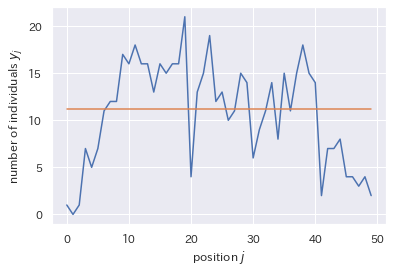

In [36]:
sns.lineplot(y=d2['V1'],x=d2.index)
sns.lineplot(y=Y_mean_0.mean(),x=range(len(Y_mean_0.mean())))
plt.xlabel('position $j$')
plt.ylabel('number of individuals $y_j$')

In [127]:
print(fit.stansummary(pars=None, probs=(0.025, 0.25, 0.5, 0.75, 0.975), digits_summary=2))

Inference for Stan model: anon_model_11bafb632b427bd69d16345c17f21433.
4 chains, each with iter=10000; warmup=3000; thin=1; 
post-warmup draws per chain=7000, total post-warmup draws=28000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
r[1]          -0.3    0.36    1.0  -2.77   -0.9  -0.09   0.45   1.12      8   1.28
r[2]         -0.21    0.36   0.99  -2.66   -0.8   0.02   0.52   1.14      7    1.3
r[3]          0.04    0.36   0.97  -2.39  -0.54    0.3   0.77   1.32      7   1.31
r[4]          0.44    0.36   0.96  -1.96  -0.13   0.72   1.16   1.66      7   1.32
r[5]          0.66    0.36   0.95  -1.75   0.09   0.94   1.38   1.86      7   1.33
r[6]          0.92    0.36   0.95  -1.48   0.36   1.21   1.64    2.1      7   1.33
r[7]           1.2    0.36   0.94  -1.22   0.63    1.5   1.92   2.36      7   1.33
r[8]          1.37    0.36   0.94  -1.06    0.8   1.67   2.09   2.51      7   1.33
r[9]          1.49    0.36   0.94  -0.93   0.93    1.8   2.21 

In [160]:
q_range = [0.1,0.25,0.75,0.9]
Y_mean_quntile = Y_mean.quantile(q_range).T
Y_mean_quntile

,0.10,0.25,0.75,0.90
0,1.242438,1.618454,2.760329,3.423478
1,1.432624,1.821309,2.903913,3.510481
2,1.982176,2.423878,3.612333,4.287130
3,3.172309,3.717578,5.218064,6.035112
4,4.032217,4.661698,6.397106,7.345890
...,...,...,...,...
95,5.056748,5.822983,7.800274,8.922983
96,4.443258,5.144971,7.007542,8.011056
97,3.611437,4.251546,5.892062,6.771321
98,3.431801,4.072082,5.766356,6.677390


Text(0, 0.5, 'number of individuals $y_j$')

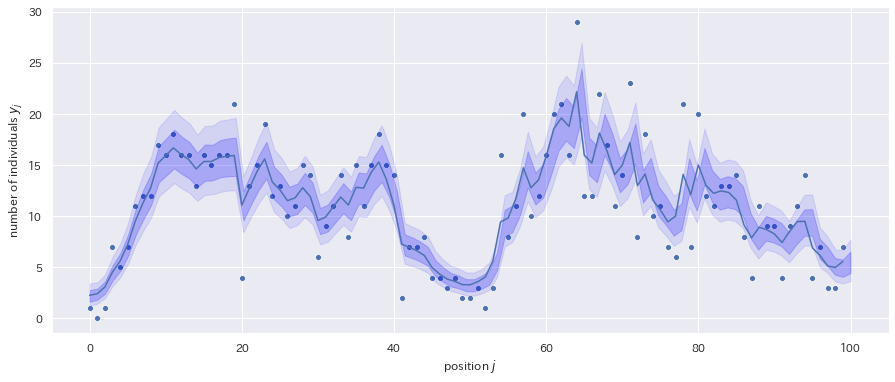

In [175]:
# 描画
plt.figure(figsize=(15,6))

x = np.linspace(0, len(Y_mean_quntile), len(Y_mean_quntile))
q010 = Y_mean_quntile[Y_mean_quntile.columns[0]] #0.1
q025 = Y_mean_quntile[Y_mean_quntile.columns[1]] #0.25
q075 = Y_mean_quntile[Y_mean_quntile.columns[2]] #0.75
q090 = Y_mean_quntile[Y_mean_quntile.columns[3]] #0.9

sns.scatterplot(y=d[d.columns[0]],x=d.index)
sns.lineplot(y=Y_mean.mean(),x=range(len(Y_mean.mean())))
plt.fill_between(x, q025, q075, color='blue', alpha=0.2)
plt.fill_between(x, q010, q090, color='blue', alpha=0.1)

plt.xlabel('position $j$')
plt.ylabel('number of individuals $y_j$')